https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/
Этот набор данных включает данные для оценки уровней ожирения у лиц из Мексики, Перу и Колумбии на основе их привычек питания и физического состояния. 

In [147]:
import pandas as pd
df = pd.read_csv("C:\\Users\\HP\\Desktop\\ObesityDataSet.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Для дальнейшей работы выберем некоторые атрибуты, по моему мнению для кластеризации подходят: Gender	Age 	Height	Weight

In [148]:
df = df[[ 'Gender', 'Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']]
df.head()

,Gender,Age,Height,Weight,CH2O,FAF,TUE
0,Female,21.0,1.62,64.0,2.0,0.0,1.0
1,Female,21.0,1.52,56.0,3.0,3.0,0.0
2,Male,23.0,1.80,77.0,2.0,2.0,1.0
3,Male,27.0,1.80,87.0,2.0,2.0,0.0
4,Male,22.0,1.78,89.8,2.0,0.0,0.0


1. К текущему датасету необходимо добавить новый аттрибут, например, если есть дата рождения, то посчитать возраст или определить популярность фильма по количеству просмотров и т.п.


Создам новый атрибут "Obesity values", в котором будет написано степень ожирения человека либо же наоборот недовес. 
• Недостаточный вес Менее 18,5
• Нормальный от 18,5 до 24,9
• Избыточный вес от 25,0 до 29,9
• Ожирение I от 30,0 до 34,9
• Ожирение II от 35,0 до 39,9
• Ожирение III Выше 40.
Значения этого атрибута будут высчитываться на основе атрибута "Weight".

In [149]:
import pandas as pd
import numpy as np

def Obesity_values(row):
    first = row["Weight"]

    if (first < 18.5):
        return 'Normal'
    elif (18.5 < first < 24.9):
        return 'Normal'
    elif (25.0 < first < 29.9):
        return 'Overweight'
    elif (30.0 < first < 34.9):
        return 'Obesity I '
    elif (35.0< first < 39.9):
        return 'Obesity II'
    else:
        return 'Obesity III'
        

df["Obesity_values"] = df.apply(lambda row: Obesity_values(row), axis=1)
df.head()

,Gender,Age,Height,Weight,CH2O,FAF,TUE,Obesity_values
0,Female,21.0,1.62,64.0,2.0,0.0,1.0,Obesity III
1,Female,21.0,1.52,56.0,3.0,3.0,0.0,Obesity III
2,Male,23.0,1.80,77.0,2.0,2.0,1.0,Obesity III
3,Male,27.0,1.80,87.0,2.0,2.0,0.0,Obesity III
4,Male,22.0,1.78,89.8,2.0,0.0,0.0,Obesity III


2. "Причесать" датасет: удалить выбросы и дубли, обработать пропущенные значения, найти кривые данные и т.п.
Удаляем дубликаты:

In [150]:
df.drop_duplicates ()

,Gender,Age,Height,Weight,CH2O,FAF,TUE,Obesity_values
0,Female,21.000000,1.620000,64.000000,2.000000,0.000000,1.000000,Obesity III
1,Female,21.000000,1.520000,56.000000,3.000000,3.000000,0.000000,Obesity III
2,Male,23.000000,1.800000,77.000000,2.000000,2.000000,1.000000,Obesity III
3,Male,27.000000,1.800000,87.000000,2.000000,2.000000,0.000000,Obesity III
4,Male,22.000000,1.780000,89.800000,2.000000,0.000000,0.000000,Obesity III
...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1.728139,1.676269,0.906247,Obesity III
2107,Female,21.982942,1.748584,133.742943,2.005130,1.341390,0.599270,Obesity III
2108,Female,22.524036,1.752206,133.689352,2.054193,1.414209,0.646288,Obesity III
2109,Female,24.361936,1.739450,133.346641,2.852339,1.139107,0.586035,Obesity III


Удаляем выбосы:

In [151]:
df = df[['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']]

In [152]:
import scipy.stats as stats

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = df.apply(stats.iqr)
df_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
df_clean

,Age,Height,Weight,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.000000,0.000000,0.000000
...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,2.852339,1.139107,0.586035


Обработка пропущенных значений:

In [153]:
missing_values = df.isnull()
num_missing_values = missing_values.sum()
print("Количество пропущенных значений:")
i=0
for column in df.columns:
    print(f"{column}: {num_missing_values[i]}")
    i += 1

Количество пропущенных значений:
Age: 0
Height: 0
Weight: 0
CH2O: 0
FAF: 0
TUE: 0


Построить графики зависимости одной переменной от другой (plt.scatter), описать какие кластеры (группы) вы видите. Построить несколько разных графиков, найти ярковыраженные группы.

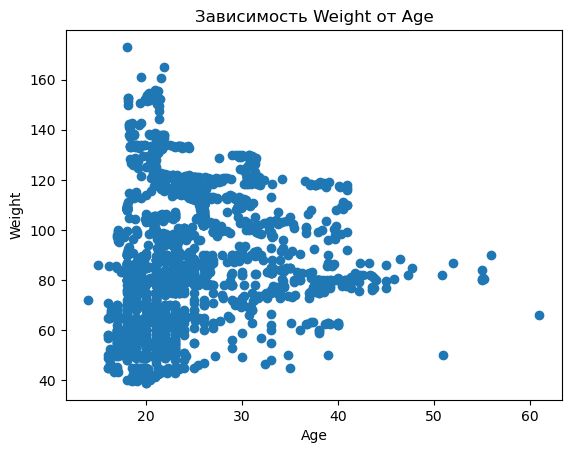

In [154]:
import matplotlib.pyplot as plt

plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Зависимость Weight от Age')
plt.scatter(df['Age'], df['Weight'])
plt.show()

На этом графике я могу определить 2 кластера, один из которых расположен на Age от 15 до 50 и воторой от 50 до 60.

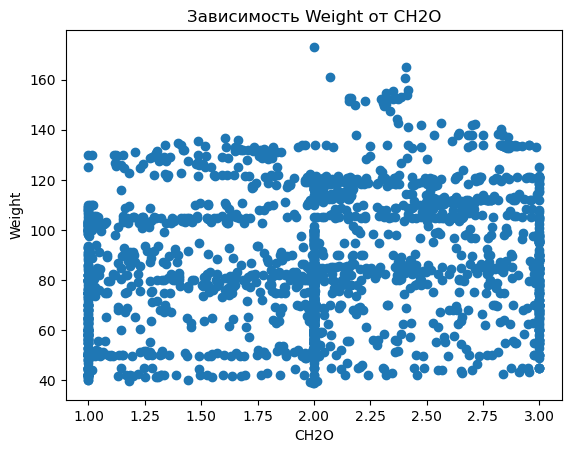

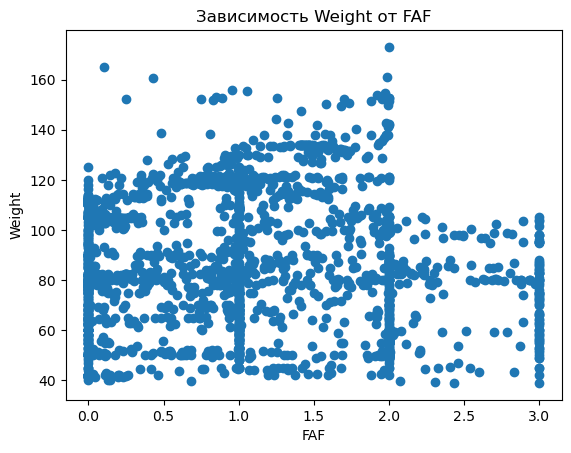

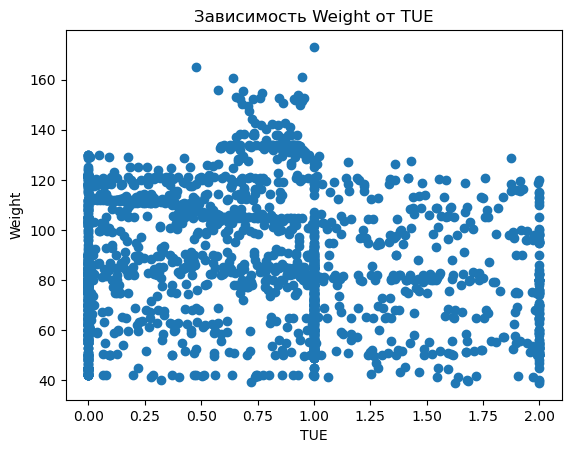

In [155]:

plt.xlabel('CH2O')
plt.ylabel('Weight')
plt.title('Зависимость Weight от CH2O')
plt.scatter(df['CH2O'], df['Weight'])
plt.show()

plt.xlabel('FAF')
plt.ylabel('Weight')
plt.title('Зависимость Weight от FAF')
plt.scatter(df['FAF'], df['Weight'])
plt.show()

plt.xlabel('TUE')
plt.ylabel('Weight')
plt.title('Зависимость Weight от TUE')
plt.scatter(df['TUE'], df['Weight'])
plt.show()


На всех построенных графиках видны ярковыраженные группы.

4. Изучить перечисленные ноутбуки, по примеру, попробовать применить метод KMeans к вашему датасету


In [177]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [182]:
df.head()

,Age,Height,Weight,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,2.0,1.0
3,27.0,1.80,87.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,0.0,0.0


Проверим основные значения атрибута 'Weight' в датасете.

In [183]:
df['Age'].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

Нормализуем данные с помощью масштабирования MinMax, предоставляемого sklearn

In [185]:
from sklearn import preprocessing
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df)

In [187]:
df_scaled = pd.DataFrame(minmax_processed, index=df.index, columns=df.columns[:])

In [188]:
df_scaled.head()

,Age,Height,Weight,CH2O,FAF,TUE
0,0.148936,0.320755,0.186567,0.5,0.000000,0.5
1,0.148936,0.132075,0.126866,1.0,1.000000,0.0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.5
3,0.276596,0.660377,0.358209,0.5,0.666667,0.0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.0


Найдём оптимальное количество кластеров для метода kMeans

In [193]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [ ]:
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

In [194]:
print(score)

[-747.8728321288861, -591.9700592608151, -491.0228788970476, -425.0317086878999, -385.2307956303735, -354.4076932408152, -325.7467702540956, -304.34562592740383, -287.29647021207126, -271.6050636373439, -262.2968940408166, -249.19670527690764, -239.60359553476934, -226.30490915919248, -217.46496865116183, -212.1345696878606, -205.04852285806845, -198.2344954722826, -190.93137710162208]


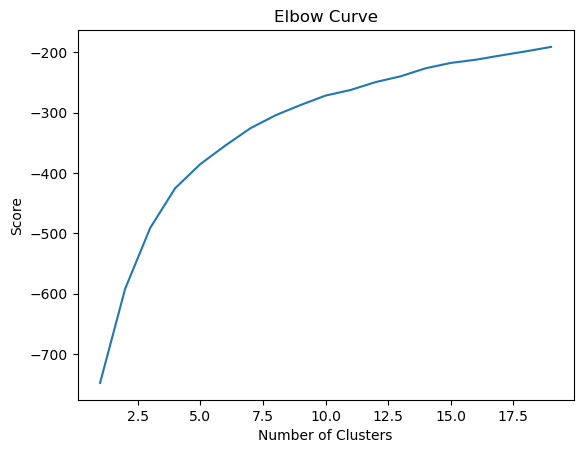

In [195]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Как я поняла по графику, оптимальным числом кластеров для алгоритма будет 10.


In [211]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(df_scaled)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [213]:
len(kmeans.labels_)

2111

In [214]:
df['cluster'] = kmeans.labels_

In [215]:
df.head()

,Age,Height,Weight,CH2O,FAF,TUE,cluster
0,21.0,1.62,64.0,2.0,0.0,1.0,8
1,21.0,1.52,56.0,3.0,3.0,0.0,7
2,23.0,1.80,77.0,2.0,2.0,1.0,2
3,27.0,1.80,87.0,2.0,2.0,0.0,7
4,22.0,1.78,89.8,2.0,0.0,0.0,9


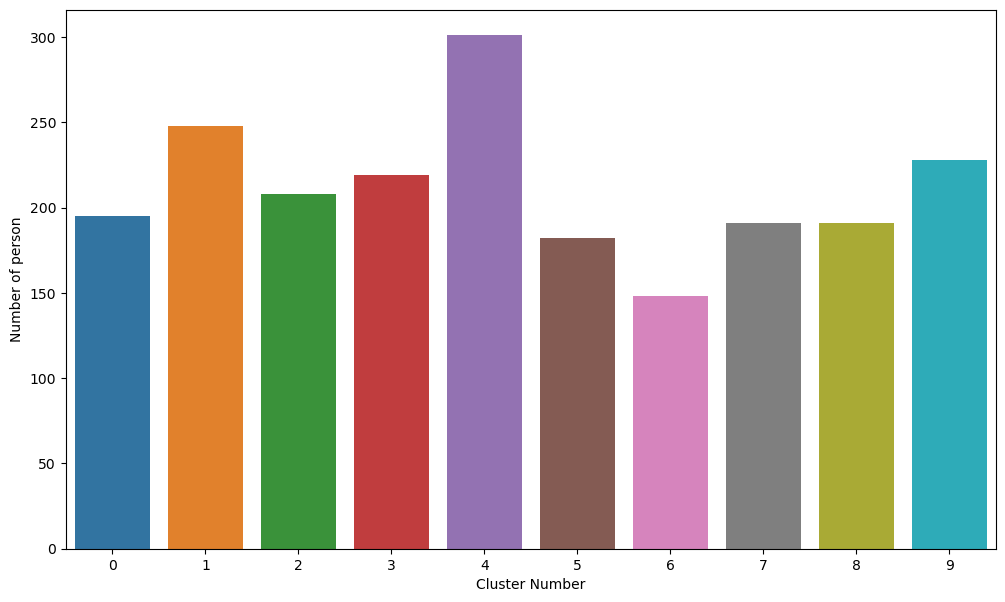

In [220]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,10,1),y=df.groupby(['cluster']).count()['Weight'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of person")

Посмотрим на значения кластеров:

In [221]:
df.groupby(['cluster']).mean()

,Age,Height,Weight,CH2O,FAF,TUE
cluster,,,,,,
0,22.544528,1.643269,77.228645,1.169425,0.346442,1.188896
1,25.416412,1.655301,93.547791,2.738210,0.336326,0.319323
2,21.397266,1.723204,70.328619,2.292531,2.304673,1.328267
3,22.734754,1.785216,122.870068,2.528832,1.379128,0.795231
4,26.463777,1.617464,70.847103,1.536908,0.359467,0.092720
5,25.412446,1.728409,93.833624,1.208460,1.615437,0.576121
6,22.651338,1.710148,84.241788,2.244522,0.516710,1.789339
7,23.994597,1.717964,72.307728,2.327973,2.153498,0.110475
8,21.879299,1.685459,72.871759,1.991425,0.630382,0.944181


5. Выводы

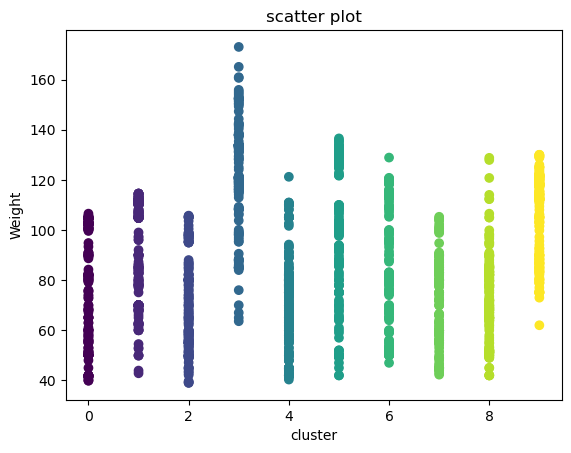

In [222]:
plt.scatter(df['cluster'], df['Weight'], c=df['cluster'], cmap='viridis')
plt.xlabel('cluster')
plt.ylabel('Weight')
plt.title('scatter plot')
plt.show()

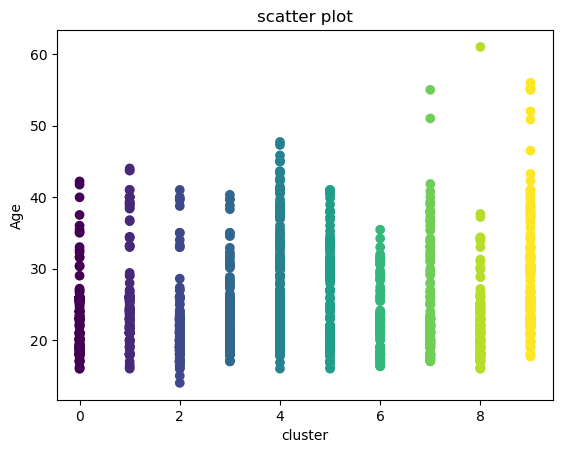

In [223]:
plt.scatter(df['cluster'], df['Age'], c=df['cluster'], cmap='viridis')
plt.xlabel('cluster')
plt.ylabel('Age')
plt.title('scatter plot')
plt.show()

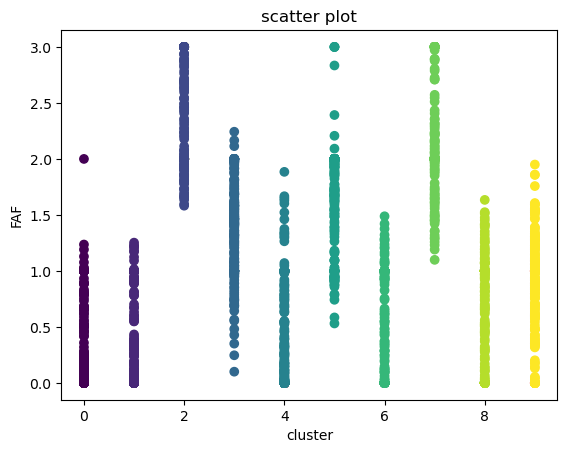

In [224]:
plt.scatter(df['cluster'], df['FAF'], c=df['cluster'], cmap='viridis')
plt.xlabel('cluster')
plt.ylabel('FAF')
plt.title('scatter plot')
plt.show()

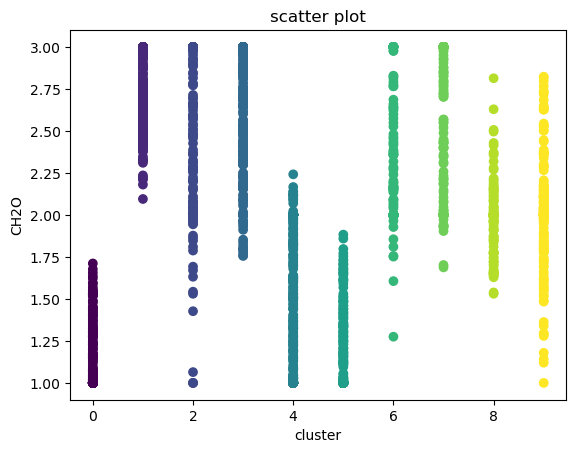

In [225]:
plt.scatter(df['cluster'], df['CH2O'], c=df['cluster'], cmap='viridis')
plt.xlabel('cluster')
plt.ylabel('CH2O')
plt.title('scatter plot')
plt.show()

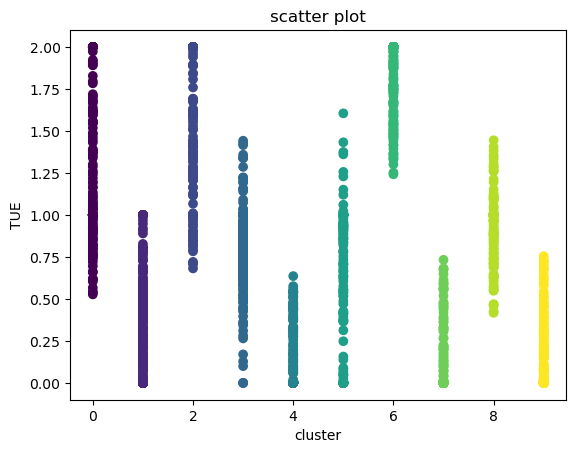

In [226]:
plt.scatter(df['cluster'], df['TUE'], c=df['cluster'], cmap='viridis')
plt.xlabel('cluster')
plt.ylabel('TUE')
plt.title('scatter plot')
plt.show()